In [47]:
import pandas as pd

In [48]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
df=pd.read_csv('data/diamonds.csv')

In [50]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [52]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [53]:
df.duplicated().sum()

146

In [54]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [55]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [56]:
numerical_cols=[]
categorical_cols=[]
for i in df.columns:

    if df[i].dtypes!="O":
        numerical_cols.append(i)
    else:
        categorical_cols.append(i)
    

In [57]:
numerical_cols

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

/n


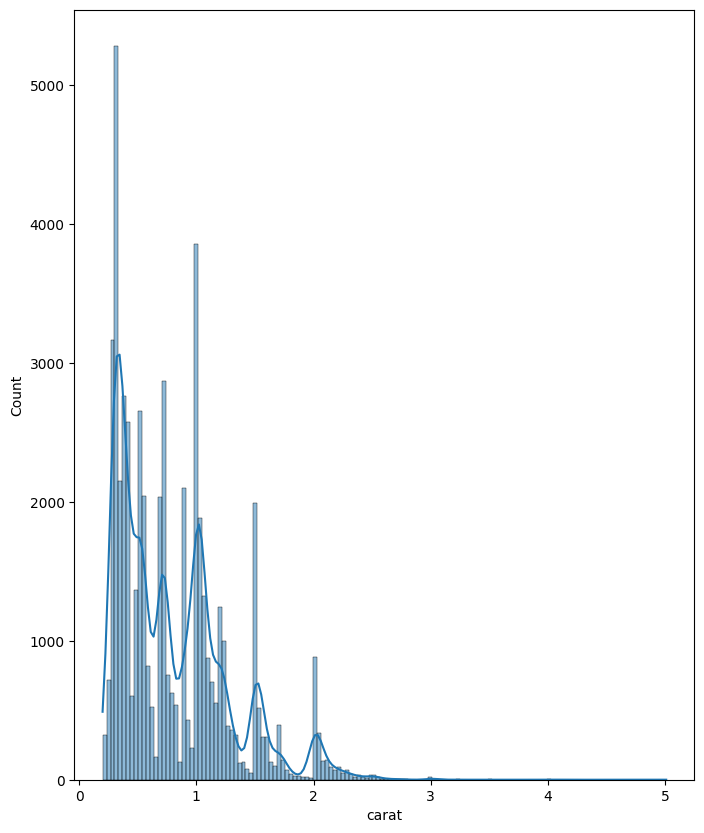

/n


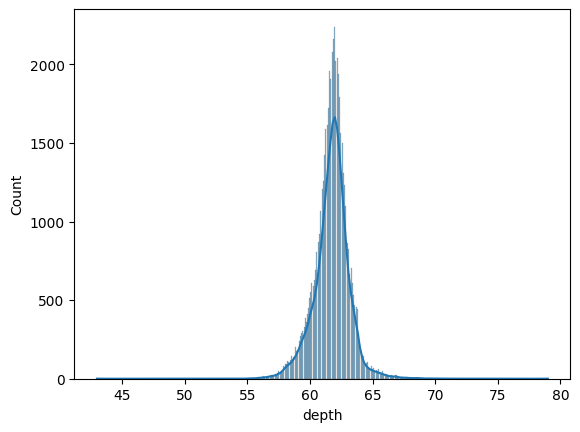

/n


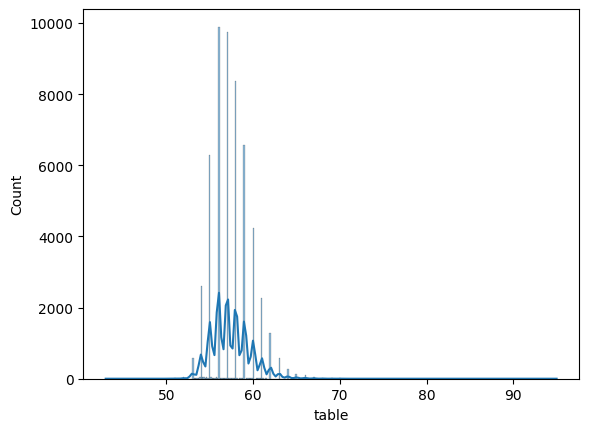

/n


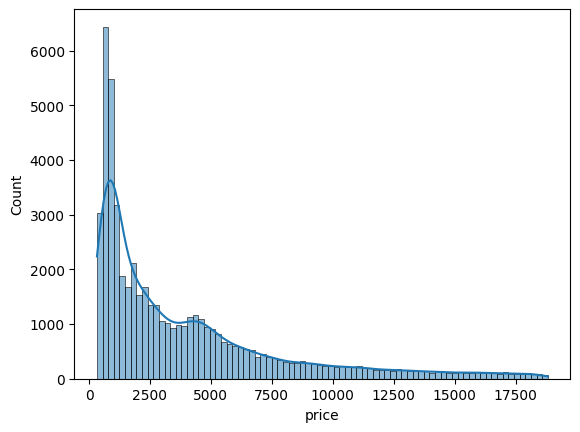

/n


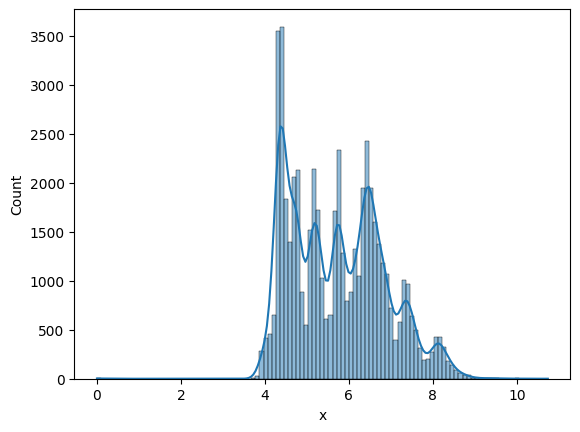

/n


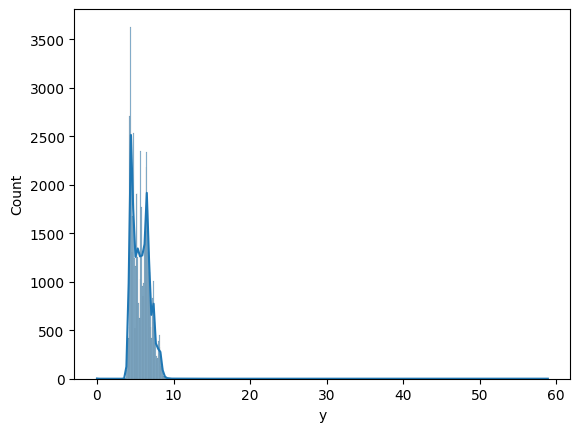

/n


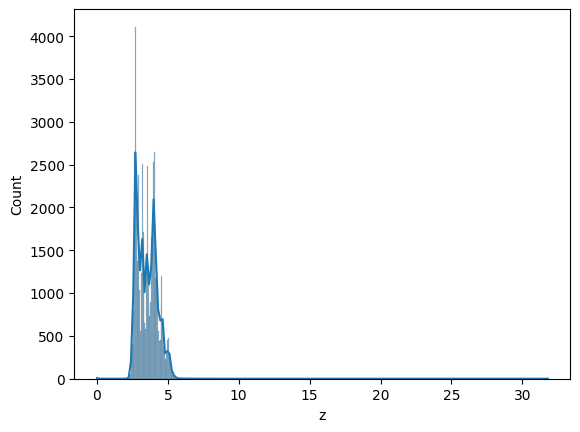

In [58]:
plt.figure(figsize=(8,10))
for i in numerical_cols:
    sns.histplot(data=df,x=i,kde=True)
    print("/n")
    plt.show()
    

<Figure size 800x600 with 0 Axes>

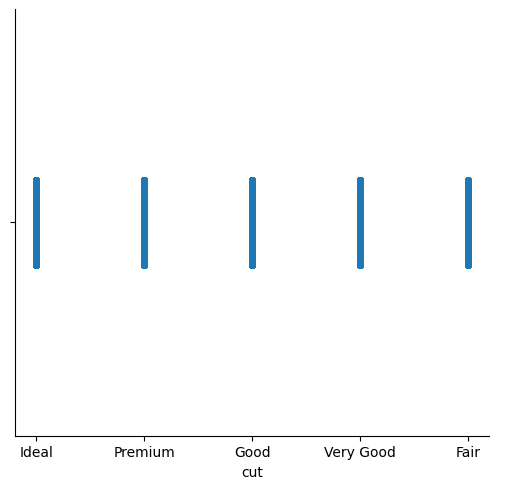

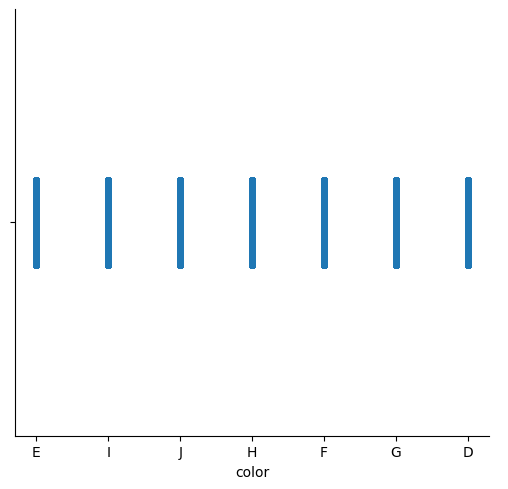

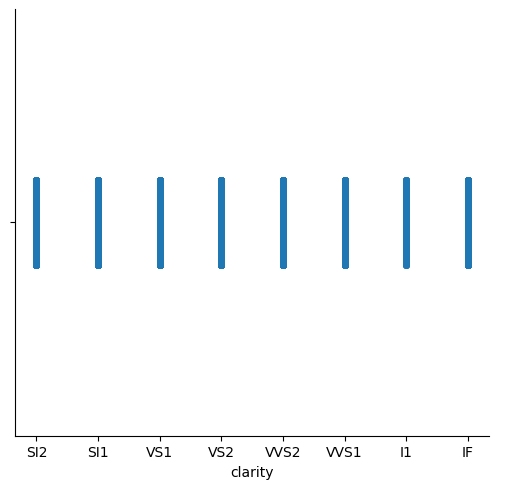

In [59]:
plt.figure(figsize=(8,6))
for i in categorical_cols:
    sns.catplot(data=df,x=i)
    print("\n")
    plt.show()
    

<Axes: >

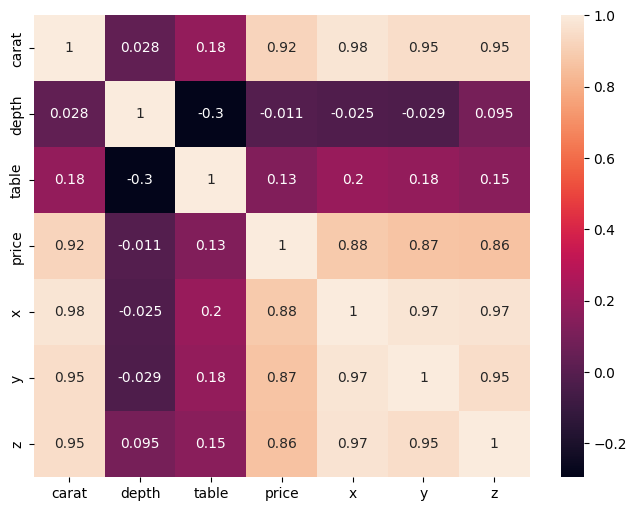

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(),annot=True)

In [61]:
df[numerical_cols].describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [62]:
df[categorical_cols].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [63]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [64]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [65]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [66]:
color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [67]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [68]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [69]:
df["cut"]=df["cut"].map(cut_map)
df["color"]=df["color"].map(color_map)
df["clarity"]=df["clarity"].map(clarity_map)

In [70]:
cut_categories=["Fair","Good","Very Good","Premium","Ideal"]
color_categories=["D","E","F","G","H","I","J"]
clarity_categories=["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [74]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    
    
])


cat_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("Ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ("scaler",StandardScaler())
])


preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [82]:
X=df.drop(columns="price")
y=df[["price"]]

In [85]:
X.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)

In [79]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

ValueError: A given column is not a column of the dataframe